# DataFrame에서 문자열 변수(컬럼) 다루기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# mpg 데이터셋

In [3]:
mpg = sns.load_dataset('mpg')

In [4]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


*   mpg 데이터프레임에 company 이름의 파생변수(컬럼)을 추가.
*   company 컬럼의 값은 name 컬럼의 첫번째 단어.

In [6]:
mpg['company'] = mpg.name.str.split().str[0]
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,vw
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford


In [7]:
companies = mpg.company.unique()
companies

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [8]:
companies.sort()
companies

array(['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt',
       'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat',
       'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes',
       'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel',
       'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru',
       'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo',
       'vw'], dtype=object)

In [9]:
companies.size

37

## 이름 오타 수정

In [10]:
mpg.loc[mpg.company == 'chevroelt', 'company'] = 'chevrolet'
mpg.loc[mpg.company == 'maxda', 'company'] = 'mazda'
mpg.loc[mpg.company == 'mercedes', 'company'] = 'mercedes-benz'
mpg.loc[mpg.company == 'toyouta', 'company'] = 'toyota'
mpg.loc[mpg.company == 'vokswagen', 'company'] = 'volkswagen'

In [11]:
companies = mpg.company.unique()
companies.sort()
companies

array(['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevrolet',
       'chevy', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi',
       'honda', 'mazda', 'mercedes-benz', 'mercury', 'nissan',
       'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault',
       'saab', 'subaru', 'toyota', 'triumph', 'volkswagen', 'volvo', 'vw'],
      dtype=object)

In [14]:
companies.size

32

# movies 데이터셋

In [15]:
movies_file = 'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/datasets/movielens/movies.dat'

In [28]:
# movies.dat 파일은 값들이 '::' 로 구분된 csv 파일.
movies = pd.read_csv(movies_file, sep = '::',                       # 구분자
                     names = ['movie_id', 'title', 'genres'],       # 컬럼 이름
                     engine= 'python')                              # sep = '::' 때문에 발생하는 경고(warning)을 없애기 위해서

In [29]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [33]:
movies.tail()

,movie_id,title,genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [34]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


#   장르 분석

*   장르 분석
    *   장르가 Animation인 영화는 몇 개?
    *   가장 많이 등장하는 장르 이름?
*   개봉 연도 분석
    *   연도별 개봉 영화 숫자   

## 장르가 animation인 영화

In [35]:
animations = movies[movies.genres.str.contains('Animation')]

In [36]:
animations.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
12,13,Balto (1995),Animation|Children's
47,48,Pocahontas (1995),Animation|Children's|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children's|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children's


In [37]:
animations.tail()

,movie_id,title,genres
3690,3759,Fun and Fancy Free (1947),Animation|Children's|Musical
3706,3775,Make Mine Music (1946),Animation|Children's|Musical
3707,3776,Melody Time (1948),Animation|Children's|Musical
3730,3799,Pokémon the Movie 2000 (2000),Animation|Children's
3875,3945,Digimon: The Movie (2000),Adventure|Animation|Children's


In [38]:
animations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 3875
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  105 non-null    int64 
 1   title     105 non-null    object
 2   genres    105 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.3+ KB


In [42]:
animations.size         # 행의 개수 x 열의 개수

315

In [44]:
len(animations)

105

## 장르가 Drama인 영화

In [46]:
drama = movies[movies.genres.str.contains('Drama')]

In [47]:
len(drama)

1603

## 장르가 로맨틱 코미디인 영화

In [89]:
roco = movies[(movies.genres.str.contains('Romance')) &  (movies.genres.str.contains('Comedy'))]

In [90]:
roco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 2 to 3839
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  204 non-null    int64 
 1   title     204 non-null    object
 2   genres    204 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.4+ KB


In [91]:
len(roco)

204

## 가장 많이 등장하는 영화 장르 상위 10개

In [69]:
genres = movies.genres.str.split('|', expand= True)

In [71]:
genres

,0,1,2,3,4,5
0,Animation,Children's,Comedy,None,None,None
1,Adventure,Children's,Fantasy,None,None,None
2,Comedy,Romance,None,None,None,None
3,Comedy,Drama,None,None,None,None
4,Comedy,None,None,None,None,None
...,...,...,...,...,...,...
3878,Comedy,None,None,None,None,None
3879,Drama,None,None,None,None,None
3880,Drama,None,None,None,None,None
3881,Drama,None,None,None,None,None


In [83]:
genres_count = genres[0].value_counts() + genres[1].value_counts() + genres[2].value_counts()+ genres[3].value_counts() + genres[4].value_counts() + genres[5].value_counts()

In [88]:
genres_count.tail(10)

,count
Fantasy,NaN
Film-Noir,NaN
Horror,NaN
Musical,NaN
Mystery,NaN
Romance,NaN
Sci-Fi,NaN
Thriller,NaN
War,143.0
Western,NaN


### 오쌤방법

In [99]:
genres = []         # 장르들을 저장하기 위한 리스트
for x in movies.genres:
    genres.extend(x.split(sep = '|'))

In [110]:
genres_series = pd.Series(genres)           # list --> pd.Series 타입으로 변환
genre_count = genres_series.value_counts()
genre_count

,count
Drama,1603
Comedy,1200
Action,503
Thriller,492
Romance,471
Horror,343
Adventure,283
Sci-Fi,276
Children's,251
Crime,211


In [116]:
top10_genre = genre_count.head(10)
top10_genre

,count
Drama,1603
Comedy,1200
Action,503
Thriller,492
Romance,471
Horror,343
Adventure,283
Sci-Fi,276
Children's,251
Crime,211


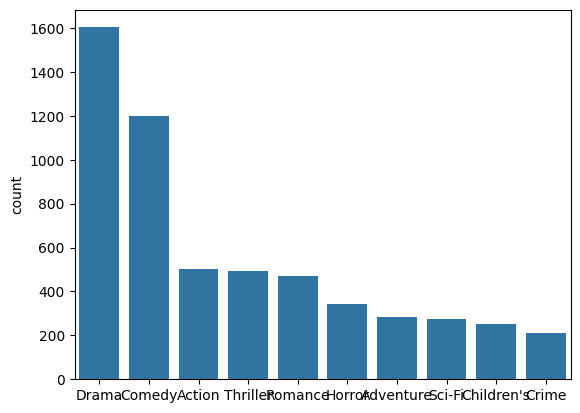

In [118]:
sns.barplot(data = top10_genre)         # 세로 막대 그래프
plt.show()

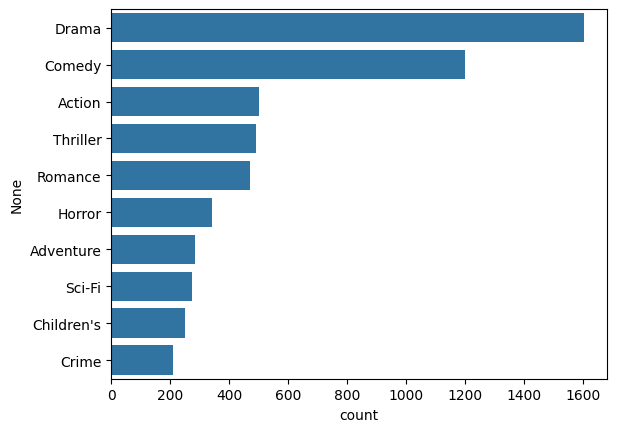

In [120]:
sns.barplot(x = top10_genre, y = top10_genre.index)
plt.show()

등장하는 영화 장르 하위 10개

In [122]:
low10_genre = genre_count.tail(10)
low10_genre

,count
Children's,251
Crime,211
War,143
Documentary,127
Musical,114
Mystery,106
Animation,105
Fantasy,68
Western,68
Film-Noir,44


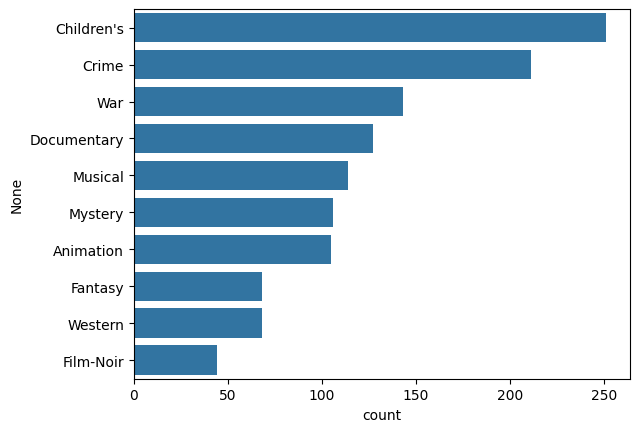

In [123]:
sns.barplot(x = low10_genre, y = low10_genre.index)
plt.show()

## 영화 개봉 연도 분석

*   영화 제목(title)에서 영화 개봉 연도를 찾아서 파생 변수(year) 생성
*   연도별 개봉 영화 수
*   그래프 시각화

In [125]:
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [128]:
title = movies.title
title

,title
0,Toy Story (1995)
1,Jumanji (1995)
2,Grumpier Old Men (1995)
3,Waiting to Exhale (1995)
4,Father of the Bride Part II (1995)
...,...
3878,Meet the Parents (2000)
3879,Requiem for a Dream (2000)
3880,Tigerland (2000)
3881,Two Family House (2000)


In [147]:
year = []
for i in title:
    year.extend(i.split(sep = '('))

In [148]:
y = []
for x  in year:
    if ')' in x:
        y.append(x.replace(')',''))

In [152]:
year = pd.value_counts(y)

/tmp/ipython-input-152-3941400550.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  year = pd.value_counts(y)
/tmp/ipython-input-152-3941400550.py:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  year = pd.value_counts(y)


In [154]:
year.head(10)

,count
1996,345
1995,342
1998,337
1997,315
1999,283
1994,257
1993,165
2000,156
1986,104
1992,102


### 오쌤 방법

In [167]:
movies['year'] = movies.title.str[-5:-1].astype('int')           # astype: 타입 바꾸기.

In [168]:
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [169]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
 3   year      3883 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 121.5+ KB


In [172]:
year_count = movies.year.value_counts()

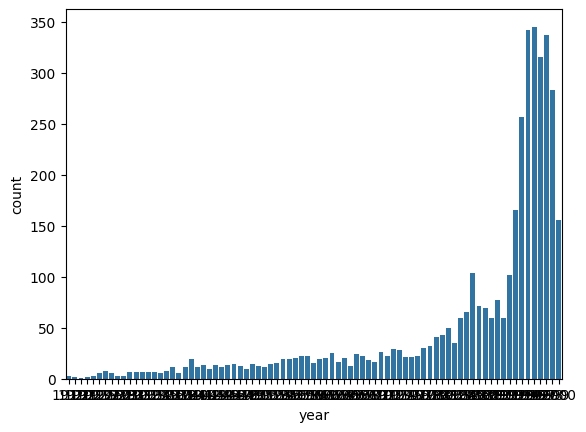

In [177]:
sns.barplot(data = year_count)
plt.show()

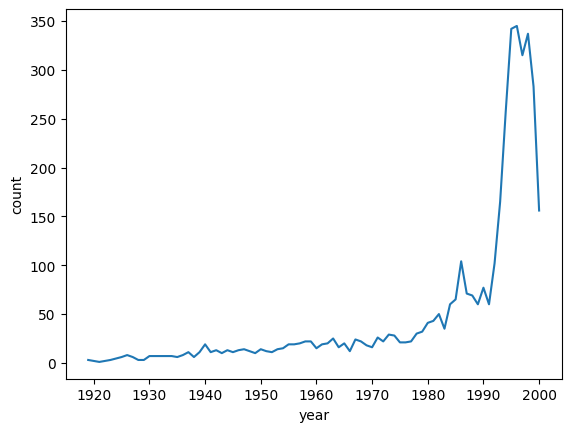

In [178]:
sns.lineplot(data = year_count)
plt.show()